In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud,STOPWORDS

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding,Dropout,Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [42]:
%matplotlib inline

In [43]:
%pwd

'/home/ubuntu/courses/deeplearning2'

In [50]:
df = pd.DataFrame()

In [44]:
current_dir = os.getcwd(); current_dir

'/home/ubuntu/courses/deeplearning2'

In [45]:
path = current_dir + '/data/jigsaw/'

In [46]:
df_train = pd.read_csv(path+ 'train.csv')

In [47]:
df_test = pd.read_csv(path + 'test.csv')

In [51]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [57]:
a=df_train[df_train['toxic'] ==1]
len(a)

9237

In [58]:
df_train["toxic_label"] = (df_train==1).any(axis=1)

In [59]:
df_train[:30]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_label
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,True
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,False
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,False
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,False
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,False
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0,False
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0,False
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0,False
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0,False
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0,False


In [32]:
is_toxic =df_train.toxic_label.value_counts()

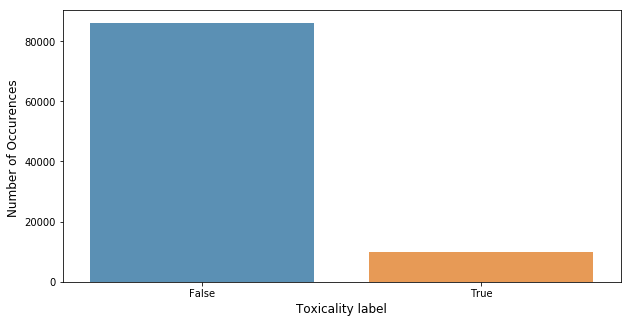

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(is_toxic.index, is_toxic.values, alpha=0.8)
plt.ylabel('Number of Occurences ',fontsize = 12)
plt.xlabel('Toxicality label', fontsize =12)
plt.show()

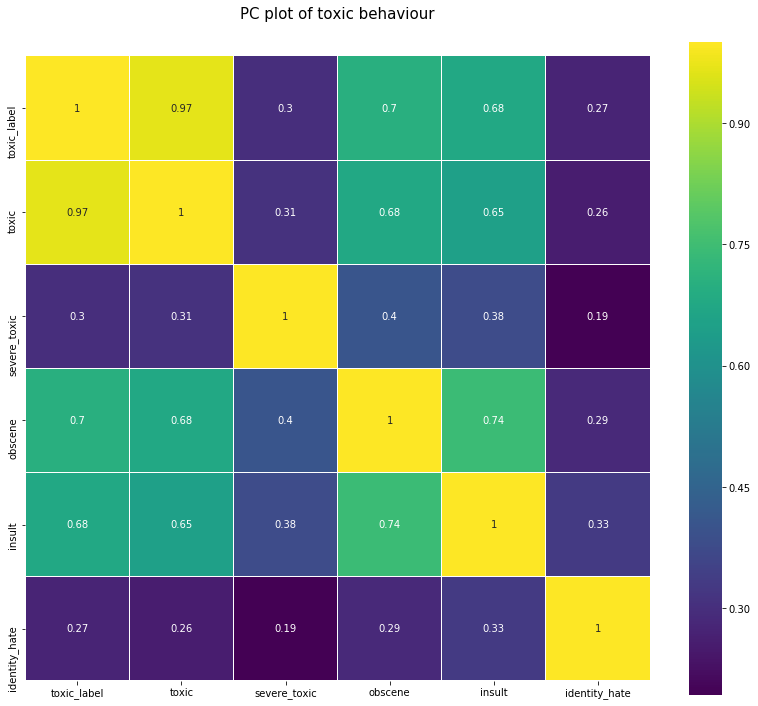

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('PC plot of toxic behaviour', y =1.05, size =15)
sns.heatmap(df_train[['toxic_label','toxic','severe_toxic','obscene','insult','identity_hate']].astype(float).corr(),linewidths=0.1,
           vmax=1.0, square = True, cmap = colormap, linecolor ='white',annot=True)


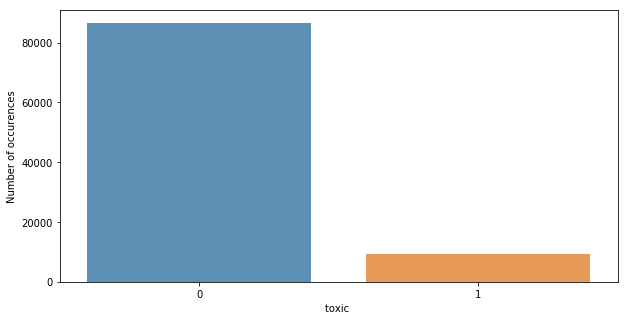

In [52]:
is_toxic = df_train.toxic.value_counts()
plt.figure(figsize = (10,5))
sns.barplot(is_toxic.index,is_toxic.values,alpha=0.8)
plt.ylabel('Number of occurences')
plt.xlabel('toxic ')
plt.show()

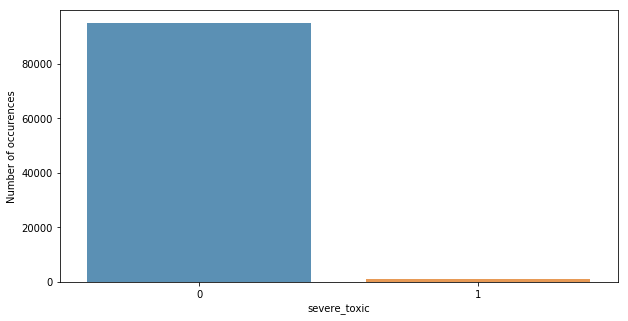

In [54]:
is_toxic = df_train.severe_toxic.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('severe_toxic')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

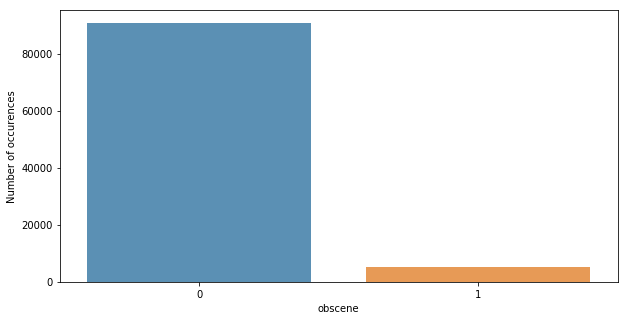

In [55]:
is_toxic = df_train.obscene.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('obscene')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

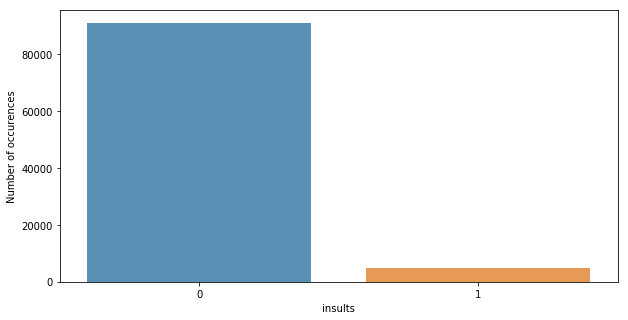

In [57]:
is_toxic = df_train.insult.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('insults')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

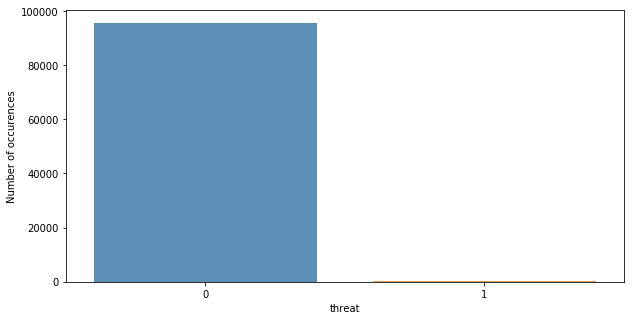

In [58]:
is_toxic = df_train.threat.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('threat')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

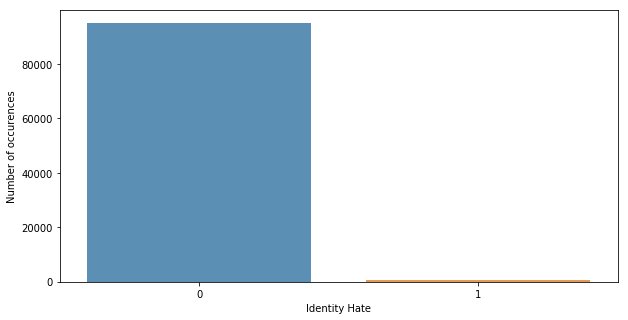

In [59]:
is_toxic = df_train.identity_hate.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('Identity Hate')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

In [62]:
train_w = pd.Series(test_var.tolist())

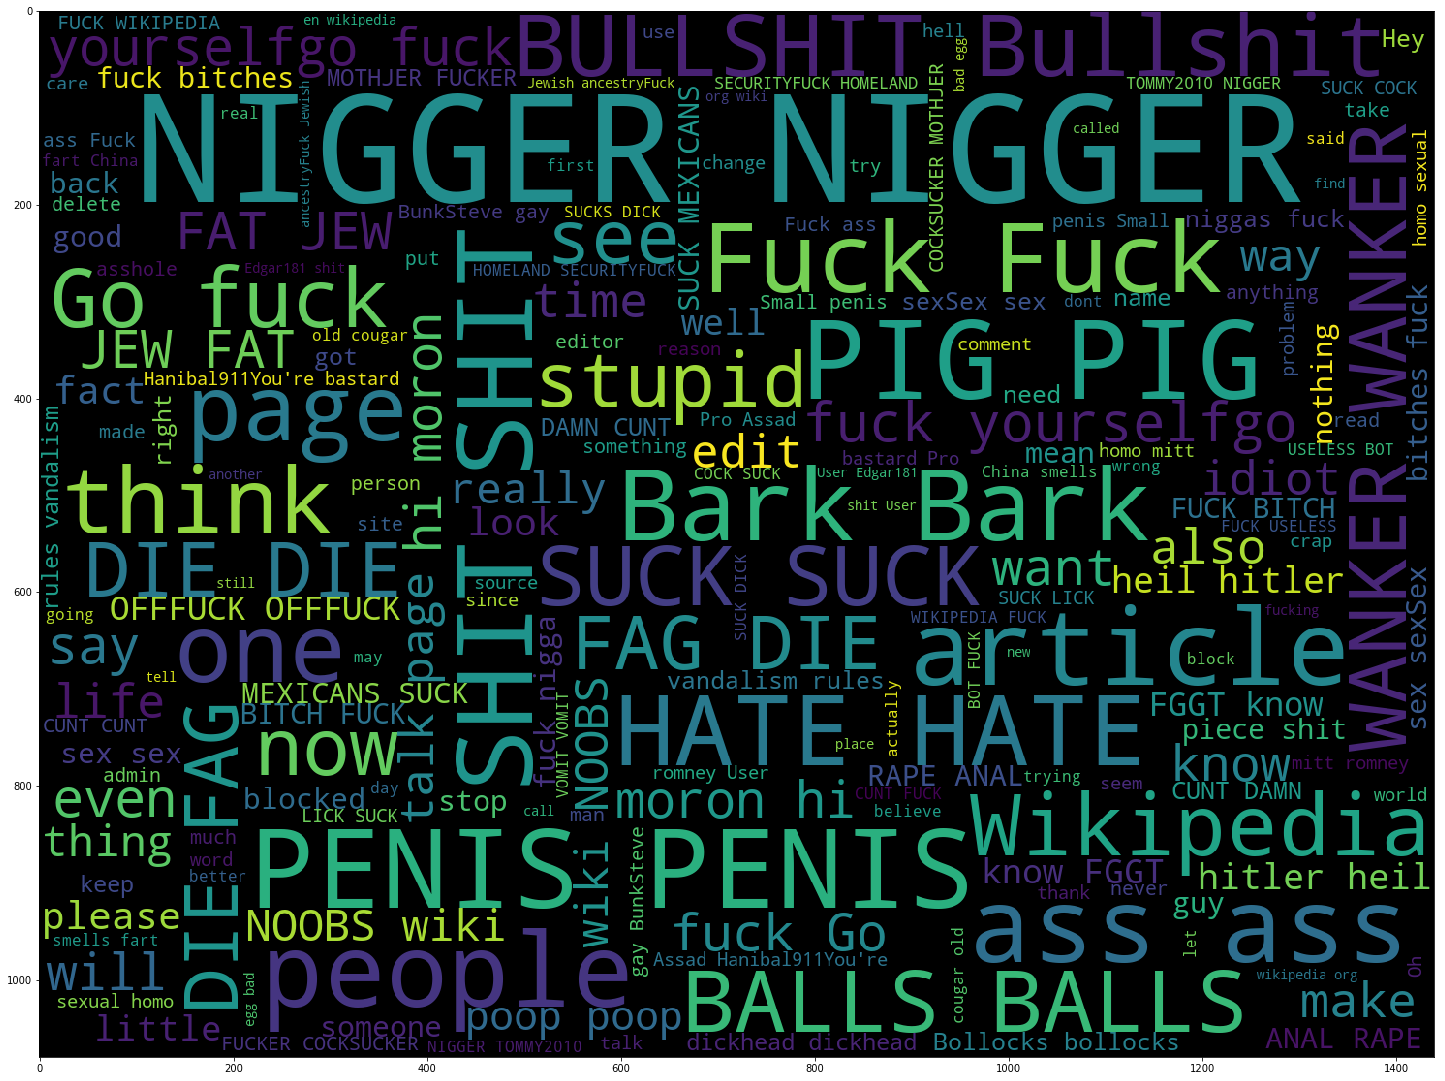

In [63]:
cloud = WordCloud(width=1440,height=1080).generate(" ".join(train_w.astype(str)))
plt.figure(figsize=(25,20))
plt.imshow(cloud)

In [60]:
test_var = df_train[df_train['toxic_label']==True ]['comment_text']

In [61]:
test_var[:10]

0     Nonsense?  kiss off, geek. what I said is true...
20    Why hasn't Alitalia been removed rom the allia...
26    "\nThe Graceful Slick....\nIs non other than a...
30    "\n\n Stupid? \n\nAs soon as I saw the phrase ...
32    "\nBan one side of an argument by a bullshit n...
39                          Are you gay?? Sound like it
62    and in the program on last night Crime Museum:...
79    "\n\nI didn't call you a ""biased backward yan...
81    "\n\nIt was very constructive you are just ver...
86    "\n\n You know what? Fuck you! I tried to be c...
Name: comment_text, dtype: object

In [22]:
df_test[10:]

,id,comment_text
10,51720630,"""\n\n Please do not vandalize pages, as you di..."
11,52808210,"Resistance is a Killer App \n\nMany people, my..."
12,53780387,who's that?
13,55969236,couldnt find a map of the location of the empi...
14,59321043,":I agree.\n:Absolutely, is out of touch and t..."
15,59993753,Welcome to Wikipedia. We invite everyone to co...
16,60087415,"In my view, the infobox on this article ought ..."
17,62246374,==JUST PROPAGANDA ARTICLE==
18,63082469,"""\n\n Regulus not Flaminius \n\nAs another rea..."
19,66675140,"Ok, let's get this peace pipe going (or I have..."


## First Model

In [64]:
X_train = df_train['comment_text'].fillna("_na_").values

In [65]:
list_classes = ['toxic', 'severe_toxic','obscene', 'threat','insult','identity_hate']

In [66]:
y = df_train[list_classes].values

In [67]:
y[:10]

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [68]:
X_test = df_test['comment_text'].fillna("_na_").values

In [69]:
embed_size =50
max_features = 20000
max_len = 100



In [40]:
import pickle

In [72]:
home_path ='/home/ubuntu/courses/'

In [70]:
X_train[:2]

array([ "Nonsense?  kiss off, geek. what I said is true.  I'll have your account terminated.",
       '"\n\n Please do not vandalize pages, as you did with this edit to W. S. Merwin. If you continue to do so, you will be blocked from editing.    "'], dtype=object)

In [73]:
pc_path = home_path+ '/deeplearning1/nbs/data/imdb/glove.6B.50d.txt'

In [74]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(X_train))
list_seq_train = tokenizer.texts_to_sequences(X_train)
list_seq_test = tokenizer.texts_to_sequences(X_test)
X_tr = pad_sequences(list_seq_train,maxlen = max_len)
X_te = pad_sequences(list_seq_test, maxlen = max_len)

In [75]:
def get_coeff(word,*arr): return word, np.asarray(arr,dtype='float32')
embedding_index = dict(get_coeff(*o.strip().split()) for o in open(pc_path))

In [88]:
len(embedding_index)

400000

In [78]:
all_embs = np.stack(embedding_index.values())
emb_mean = all_embs.mean()
emb_std = all_embs.std(); emb_mean,emb_std

(0.020940498, 0.6441043)

In [90]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean,emb_std,(nb_words,embed_size))
for word,i in word_index.items():
    if  i >= max_features : continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None : embedding_matrix[i] = embedding_vector
        
        

In [94]:
inp = Input(shape = (max_len,))
x = Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(6,activation='sigmoid')(x)

In [96]:
model = Model(inputs = inp,output=x)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [100]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
model.fit(X_tr,y,epochs=2)

Epoch 1/2
95851/95851 [==============================] - 1097s - loss: 0.0648 - acc: 0.9779  
Epoch 2/2
95851/95851 [==============================] - 1077s - loss: 0.0461 - acc: 0.9827  


model.predict()

In [103]:
y_test = model.predict(X_te, batch_size=1024,verbose=1)

226998/226998 [==============================] - 25s    


In [105]:
sample_submission = pd.read_csv(path+ 'sample_submission.csv')

In [106]:
sample_submission[list_classes] = y_test

In [108]:
sample_submission.to_csv(path+'sub01.csv',index=False)